# CRANTpy Tutorial: Exploring the Ant Brain Connectome

This tutorial will guide you through the main features of CRANTpy, showing you how to:

1. **Query neurons** based on anatomical and functional criteria
2. **Access morphological data** including meshes and skeletons
3. **Visualize neurons** in 2D 
4. **Work with different dataset versions**

Let's start by importing CRANTpy and setting up the environment.

In [1]:
# Import CRANTpy and other necessary libraries
import crantpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up logging to see progress
cp.set_logging_level("WARNING")  # Options: DEBUG, INFO, WARNING, ERROR, CRITICAL

print("CRANTpy loaded successfully!")
print(f"Default dataset: {cp.CRANT_DEFAULT_DATASET}")

CRANTpy loaded successfully!
Default dataset: latest


## 1. Authentication Setup

Before we can access the data, we need to authenticate with the CAVE service. This is typically a one-time setup.

In [2]:
# Generate and save authentication token (uncomment if first time)
# cp.generate_cave_token(save=True)

# Test connection
try:
    client = cp.get_cave_client()
    print(f"Successfully connected to datastack: {client.datastack_name}")
    print(f"Server: {client.server_address}")
except Exception as e:
    print(f"Connection failed: {e}")
    print("Please run: cp.generate_cave_token(save=True)")

Successfully connected to datastack: kronauer_ant
Server: https://proofreading.zetta.ai


## 2. Exploring Available Data

Let's start by exploring what data is available in the CRANT dataset.

In [3]:
# Get all available annotation fields
available_fields = cp.NeuronCriteria.available_fields()
print(f"Available annotation fields ({len(available_fields)}):")
for field in sorted(available_fields):
    print(f"  - {field}")

Available annotation fields (25):
  - alternative_names
  - annotator_notes
  - cave_table
  - cell_class
  - cell_instance
  - cell_subtype
  - cell_type
  - date_proofread
  - flow
  - hemilineage
  - known_nt
  - known_nt_source
  - nerve
  - ngl_link
  - nucleus_id
  - proofread
  - proofreader_notes
  - region
  - root_id
  - side
  - status
  - super_class
  - tract
  - user_annotator
  - user_proofreader


In [4]:
# Get overview of the dataset
all_annotations = cp.get_all_seatable_annotations()
print(f"Total neurons in dataset: {len(all_annotations):,}")
print(f"Dataset shape: {all_annotations.shape}")
print("\nFirst few rows:")
display(all_annotations.head())

Total neurons in dataset: 6,072
Dataset shape: (6072, 30)

First few rows:


,root_id,root_id_processed,supervoxel_id,position,nucleus_id,nucleus_position,root_position,cave_table,proofread,status,...,cell_subtype,cell_instance,known_nt,known_nt_source,alternative_names,annotator_notes,user_annotator,user_proofreader,ngl_link,date_proofread
0,576460752700282748,None,74170512125421134,"[32782, 30214, 1532]",72691394107456688,"[37306, 31317, 1405]","[37306, 31317, 1405]",None,False,"[DAMAGED, PARTIALLY_PROOFREAD, TRACING_ISSUE]",...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
1,576460752681552812,None,74100212167609429,"[32121, 31509, 1702]",72621025497478503,"[36772, 28974, 1953]","[36772, 28974, 1953]",None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
2,576460752666303418,None,74169069687405059,"[33220, 8787, 4046]",72620682436952978,"[33727, 8389, 4054]","[33727, 8389, 4054]",None,False,"[PARTIALLY_PROOFREAD, TRACING_ISSUE]",...,None,None,"acetylcholine, sNPF","Barnstedt et al. 2016 (immuno, KCs, drosophila...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
3,576460752722405178,None,74100212167388307,"[32442, 31693, 1618]",72621025497491534,"[36266, 31490, 2021]","[36266, 31490, 2021]",None,False,"[PARTIALLY_PROOFREAD, TRACING_ISSUE]",...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
4,576460752773799604,None,74100280887219649,"[32484, 32119, 1756]",72691394308791443,"[37240, 29878, 2178]","[37240, 29878, 2178]",None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None


Top 10 cell classes:
cell_class
FBc                            169
ER                             137
olfactory_projection_neuron    109
descending_neuron              108
ER_input                        95
FBt                             91
PBt                             64
pars_intercerebralis            58
EBc                             48
spiny_kenyon_cell               29
Name: count, dtype: int64


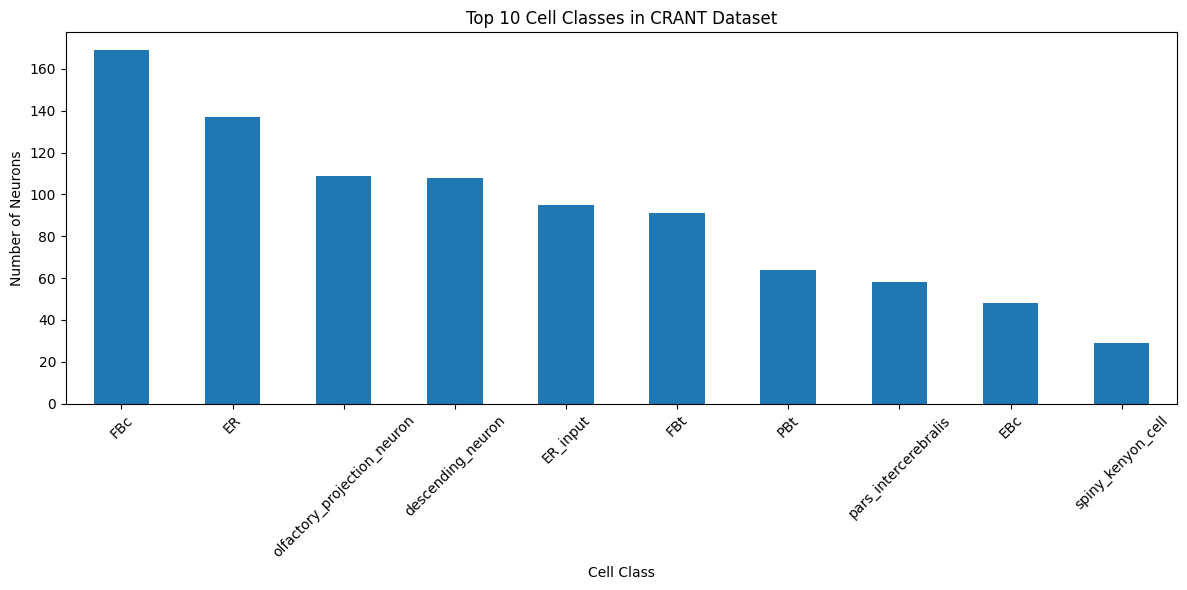

In [5]:
# Explore the distribution of cell classes
cell_class_counts = all_annotations['cell_class'].value_counts()
print("Top 10 cell classes:")
print(cell_class_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
cell_class_counts.head(10).plot(kind='bar')
plt.title('Top 10 Cell Classes in CRANT Dataset')
plt.xlabel('Cell Class')
plt.ylabel('Number of Neurons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

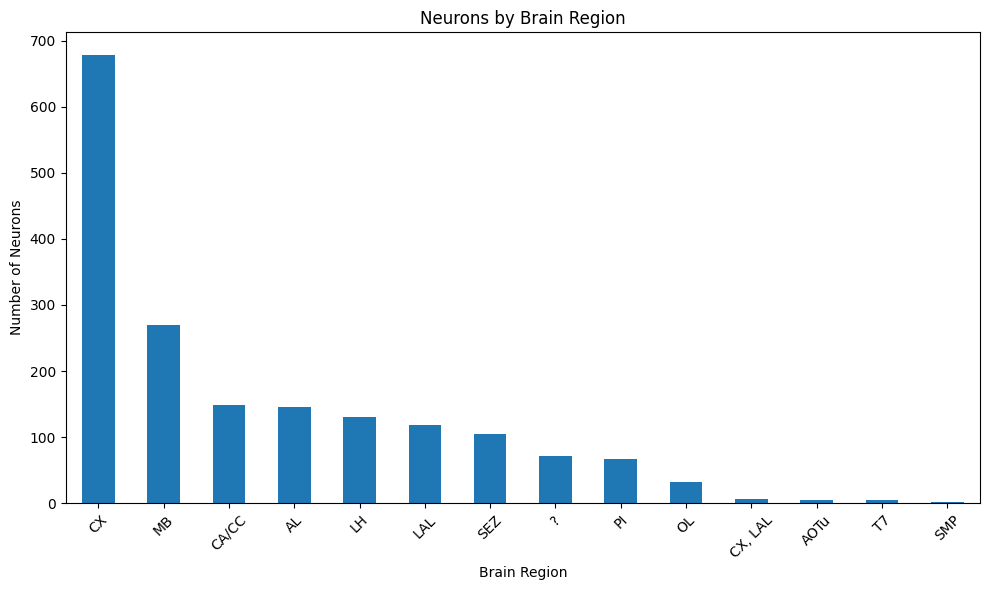

In [6]:
# Explore brain regions
# Each neuron can belong to multiple regions, therefore each entry is a list

from collections import Counter

# Flatten the region lists and count occurrences
region_lists = all_annotations['region'].dropna().tolist()
flat_regions = [region for sublist in region_lists for region in (sublist if isinstance(sublist, list) else [sublist])]
region_counts = pd.Series(Counter(flat_regions)).sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Neurons by Brain Region')
plt.xlabel('Brain Region')
plt.ylabel('Number of Neurons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Querying Neurons with NeuronCriteria

The `NeuronCriteria` class is the main interface for filtering neurons based on their annotations.

In [7]:
# Query neurons by cell class
olfactory_projection_neuron = cp.NeuronCriteria(cell_class='olfactory_projection_neuron')
opn_ids = olfactory_projection_neuron.get_roots()
print(f"Found {len(opn_ids)} olfactory projection neurons")

# Query with multiple criteria
left_projection_neurons = cp.NeuronCriteria(
    cell_class='olfactory_projection_neuron',
    side='left'
)
left_pn_ids = left_projection_neurons.get_roots()
print(f"Found {len(left_pn_ids)} left projection neurons")

Found 107 olfactory projection neurons
Found 37 left projection neurons


In [8]:
# Query neurons from specific tracts
malt_neurons = cp.NeuronCriteria(tract='mALT')
malt_ids = malt_neurons.get_roots()
print(f"Found {len(malt_ids)} neurons in mALT tract")

# Get their detailed annotations
malt_annotations = cp.get_annotations(malt_neurons)
print("\nmALT neuron types:")
print(malt_annotations['cell_class'].value_counts())

Found 2275 neurons in mALT tract

mALT neuron types:
cell_class
olfactory_projection_neuron    68
AL_T7_input                     5
Name: count, dtype: int64


## 4. Working with Precomputed Neuron Skeleton and Mesh

CRANTpy provides access to both precomputed mesh and skeleton representations of neurons. In this section, we'll see how to retrieve and do basic visualizations of these morphological data.

<div class="alert alert-warning">
  <strong>Warning:</strong> The following analyses are performed on precomputed skeletons. To use the better morphology generated from the L2 graph, please refer to the deep dive on morphology.
</div>

In [9]:
# Get a sample neuron for morphological analysis
sample_neuron_id = opn_ids[0]

# Get the neuron's skeleton - set omit_failures=True to handle problematic neurons gracefully
skeleton = cp.get_skeletons([sample_neuron_id])
print(f"Skeleton properties:")
print(f"  Nodes: {len(skeleton.nodes):,}")
print(f"  Cable length: {skeleton.cable_length[0]} nm")

Skeleton properties:
  Nodes: 221
  Cable length: 1075895.125 nm


In order to visualize neurons, we will use the `navis` library.

In [10]:
import navis

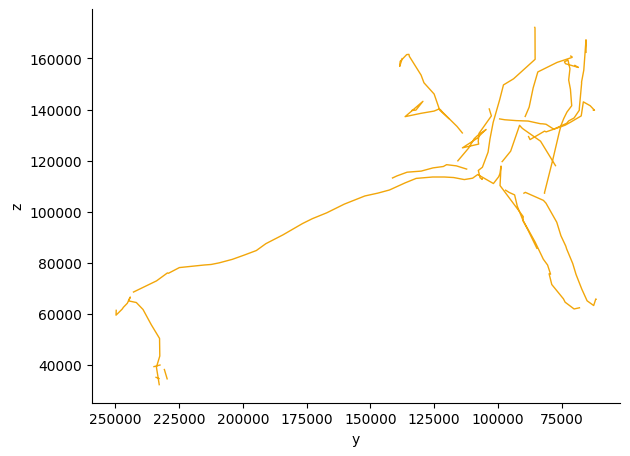

In [11]:
# 2D visualization of skeleton
fig, ax = navis.plot2d(skeleton, view=("-y", "z"), method="2d")
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [12]:
# Get the neuron's mesh
try:
    mesh = cp.get_mesh_neuron(sample_neuron_id)
    print(f"Mesh properties:")
    print(f"  Vertices: {len(mesh.vertices):,}")
    print(f"  Faces: {len(mesh.faces):,}")
    print(f"  Volume: {mesh.volume:.2f} cubic nanometers")
except Exception as e:
    print(f"⚠ Could not get mesh for neuron {sample_neuron_id}: {e}")
    print("This may be due to mesh configuration issues in the dataset.")

Mesh properties:
  Vertices: 238,432
  Faces: 478,609
  Volume: 135639679325.33 cubic nanometers


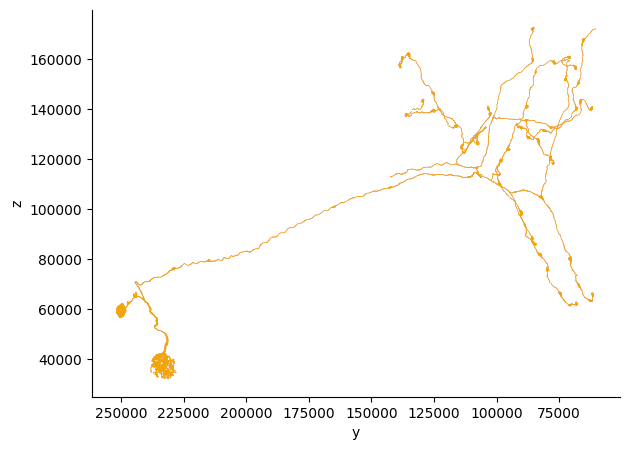

In [13]:
# plot the mesh in 2d using navis
fig, ax = navis.plot2d(mesh, view=("-y", "z"), method="2d")
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [14]:
# Get skeletons for multiple neurons
sample_opn_ids = opn_ids[:10]  # Take first 10 projection neurons
print(f"Attempting to get skeletons for {len(sample_opn_ids)} neurons...")

# Get skeletons with failure handling
try:
    opn_skeletons = cp.get_skeletons(sample_opn_ids)
    print(f"Successfully obtained {len(opn_skeletons)} skeletons out of {len(sample_opn_ids)} attempts")
except Exception as e:
    print(f"Error getting skeletons: {e}")
    print("⚠ There may be issues with the mesh data for some of these neurons.")

Attempting to get skeletons for 10 neurons...


Successfully obtained 10 skeletons out of 10 attempts


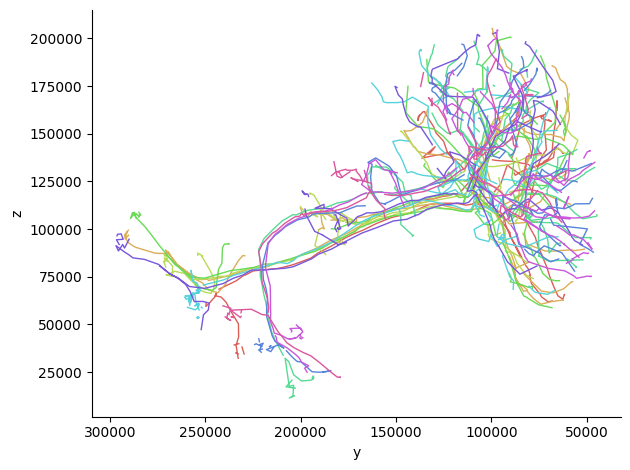

In [15]:
# 2D visualization of all skeletons
fig, ax = navis.plot2d(opn_skeletons, view=("-y", "z"), method="2d")
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

<div style="border-left:4px solid #2b8cff; background:#f0f8ff; padding:12px; border-radius:6px;">
<strong>Visualization deep dive</strong>
<p>More details on 2D/3D visualization (advanced navis usage, rendering tips, and examples) are available in the deep dive on morphology and visualization — refer to that section for extended guidance.</p>
</div>

## 6. ID Management and Updates

Neuron IDs can change over time due to proofreading. CRANTpy helps manage these changes.

In [16]:
# Check if our sample IDs are current
sample_ids = opn_ids[:5]
are_current = cp.is_latest_roots(sample_ids)

print(f"Checking {len(sample_ids)} neuron IDs:")
for i, (neuron_id, is_current) in enumerate(zip(sample_ids, are_current)):
    status = "Current" if is_current else "⚠ Outdated"
    print(f"  {neuron_id}: {status}")

Checking 5 neuron IDs:
  576460752700282748: Current
  576460752681552812: Current
  576460752722405178: Current
  576460752773799604: Current
  576460752656800770: Current


In [17]:
# Update IDs in a DataFrame
# Create a small test DataFrame
test_df = pd.DataFrame({
    'root_id': sample_ids,
    'analysis_result': np.random.randn(len(sample_ids))
})

print("Original DataFrame:")
display(test_df)

# Update IDs
updated_df = cp.update_ids(test_df, dataset="latest")

print("\nUpdated DataFrame (showing ID update info):")
display(updated_df[['old_id', 'new_id', 'confidence', 'changed']].head())

# replace old ids with new ids
# Replace old IDs with new IDs in test_df
id_map = dict(zip(updated_df['old_id'].astype(str), updated_df['new_id'].astype(str)))

# keep a copy of the original ids
test_df['root_id_original'] = test_df['root_id']

# perform the replacement (preserve values that have no mapping)
test_df['root_id'] = test_df['root_id'].astype(str).map(id_map).fillna(test_df['root_id'])

print("DataFrame after ID replacement:")
display(test_df)

Original DataFrame:


,root_id,analysis_result
0,576460752700282748,-1.085126
1,576460752681552812,-2.401884
2,576460752722405178,0.262163
3,576460752773799604,-0.319966
4,576460752656800770,0.893296


2025-10-04 19:44:48 - WARNING - Multiple supervoxel IDs found for 130 root IDs. Using first occurrence for each.



Updated DataFrame (showing ID update info):


,old_id,new_id,confidence,changed
0,576460752700282748,576460752700282748,1.0,False
1,576460752681552812,576460752681552812,1.0,False
2,576460752722405178,576460752722405178,1.0,False
3,576460752773799604,576460752773799604,1.0,False
4,576460752656800770,576460752656800770,1.0,False


DataFrame after ID replacement:


,root_id,analysis_result,root_id_original
0,576460752700282748,-1.085126,576460752700282748
1,576460752681552812,-2.401884,576460752681552812
2,576460752722405178,0.262163,576460752722405178
3,576460752773799604,-0.319966,576460752773799604
4,576460752656800770,0.893296,576460752656800770


## 10. Summary and Next Steps

This tutorial has covered the main features of CRANTpy:

✅ **Authentication and setup**  
✅ **Exploring the dataset structure**  
✅ **Querying neurons with NeuronCriteria**  
✅ **Accessing morphological data (meshes and skeletons)**  
✅ **2D visualization**  
✅ **ID management and updates**  
✅ **Advanced querying techniques**  

### Resources

- [CRANTpy Documentation](https://social-evolution-and-behavior.github.io/crantpy/)
- [API Reference](../api/modules.rst)
- [GitHub Repository](https://github.com/Social-Evolution-and-Behavior/crantpy)
- [Issue Tracker](https://github.com/Social-Evolution-and-Behavior/crantpy/issues)

Happy exploring! 🐜🧠